In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [5]:
day_of_week = pd.DatetimeIndex(df['starttime']).dayofweek

In [13]:
df['day_of_week'] = day_of_week

In [16]:
pd.value_counts(day_of_week, sort=False)

0    21266
1    20465
2    20748
3    21505
4    21097
5    20358
6    17407
dtype: int64

In [46]:
week = pd.DatetimeIndex(df['starttime']).week

In [ ]:
df['week'] = day_of_week

In [48]:
pd.value_counts(week, sort=False)

1      988
2     1647
3     1591
4     1875
5     1879
6     1295
7     2262
8     2028
9     1865
10    2417
11    2063
12    2156
13    2410
14    2468
15    2466
16    3491
17    3551
18    3080
19    3554
20    3055
21    3596
22    3873
23    3398
24    4045
25    3860
26    3609
27    4158
28    4260
29    4589
30    3777
31    4280
32    4311
33    3875
34    3889
35    3390
36    2775
37    3378
38    2838
39    3073
40    3199
41    2386
42    3360
43    2123
44    2264
45    2285
46    1977
47    1753
48    1039
49    1437
50    1438
51    1359
52    1111
dtype: int64

In [72]:
from_group_by_weekday = df.groupby(['from_station_id', 'day_of_week'])['trip_id'].count()

In [73]:
from_group_by_week = df.groupby(['from_station_id', 'week'])['trip_id'].count()

In [74]:
from_group_by_weekday_unstack =from_group_by_weekday.unstack()

In [75]:
from_counts_avg = from_group_by_weekday_unstack/52
from_counts_avg 

day_of_week,0,1,2,3,4,5,6
from_station_id,,,,,,,
BT-01,15.500000,13.923077,13.057692,15.403846,17.711538,22.076923,15.500000
BT-03,11.096154,11.423077,11.923077,11.653846,12.634615,11.480769,10.538462
BT-04,7.442308,6.750000,6.576923,7.115385,6.596154,4.269231,3.961538
BT-05,9.615385,9.442308,8.884615,9.538462,9.923077,9.711538,7.653846
CBD-03,8.980769,8.711538,8.519231,9.153846,8.942308,5.942308,6.942308
CBD-04,2.057692,1.903846,2.230769,1.903846,2.230769,1.557692,1.384615
CBD-05,8.000000,8.250000,8.884615,8.846154,8.326923,7.884615,5.519231
CBD-06,8.846154,8.826923,8.942308,9.634615,8.884615,7.115385,5.634615
CBD-07,4.519231,6.538462,5.961538,6.230769,5.846154,3.576923,2.673077


In [77]:
to_group_by_weekday = df.groupby(['to_station_id', 'day_of_week'])['trip_id'].count()

In [78]:
to_group_by_weekday_unstack =to_group_by_weekday.unstack()

In [80]:
to_counts_avg = to_group_by_weekday_unstack/52
to_counts_avg 

day_of_week,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,15.153846,12.923077,13.403846,15.230769,16.346154,22.076923,16.403846
BT-03,10.250000,9.903846,10.057692,8.634615,9.038462,8.269231,8.961538
BT-04,6.307692,5.615385,5.750000,5.500000,5.384615,3.903846,3.230769
BT-05,9.826923,9.576923,9.384615,10.596154,9.653846,9.730769,7.750000
CBD-03,11.903846,11.500000,11.942308,11.653846,12.288462,8.576923,8.269231
CBD-04,1.692308,1.884615,2.307692,1.653846,1.961538,1.730769,1.346154
CBD-05,11.923077,12.961538,14.076923,13.250000,11.596154,8.423077,6.673077
CBD-06,13.826923,14.038462,14.096154,15.557692,14.596154,9.211538,6.500000
CBD-07,5.134615,7.211538,6.961538,5.788462,6.538462,3.173077,2.365385


In [115]:
diff_counts_avg = from_counts_avg-to_counts_avg 
diff_counts_avg.head()

day_of_week,0,1,2,3,4,5,6
from_station_id,,,,,,,
BT-01,0.346154,1.000000,-0.346154,0.173077,1.365385,0.000000,-0.903846
BT-03,0.846154,1.519231,1.865385,3.019231,3.596154,3.211538,1.576923
BT-04,1.134615,1.134615,0.826923,1.615385,1.211538,0.365385,0.730769
BT-05,-0.211538,-0.134615,-0.500000,-1.057692,0.269231,-0.019231,-0.096154
CBD-03,-2.923077,-2.788462,-3.423077,-2.500000,-3.346154,-2.634615,-1.326923


In [112]:
def plot_bar1(day,plot_title):
    fig = plt.figure(figsize=(10, 8))
    diff_counts_avg[day].plot.bar()
    #rects1 = plt.bar(index, diff_counts_avg[0])
    plt.xlabel('Station')
    plt.ylabel('Differences between from and to counts')
    plt.title('Differences between from and to counts for each station on '+plot_title)

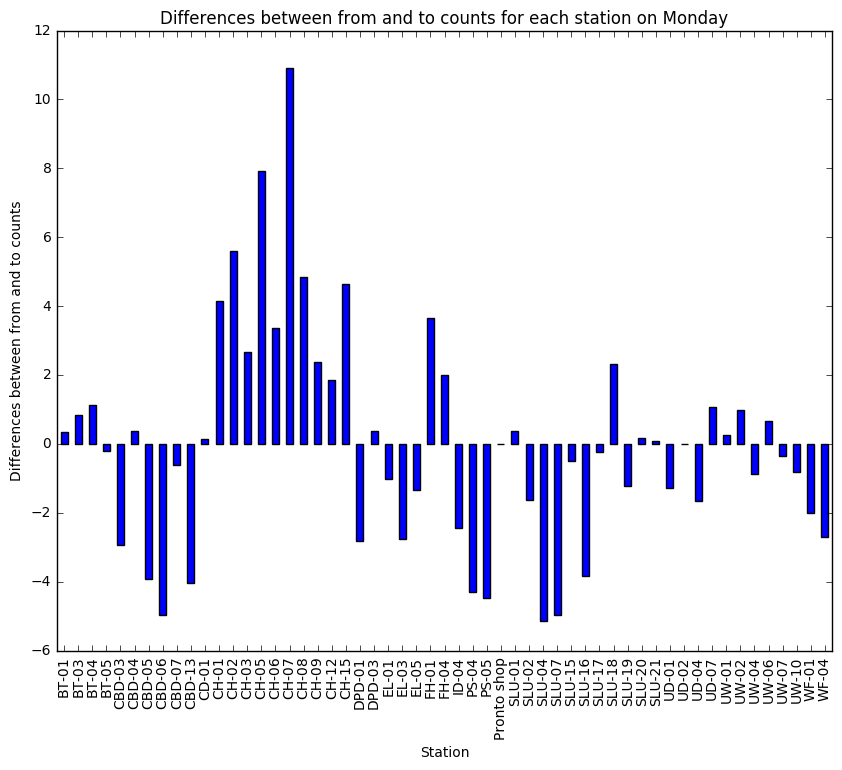

In [116]:
plot_title = "Monday"
day = 0
plot_bar1(day,plot_title)

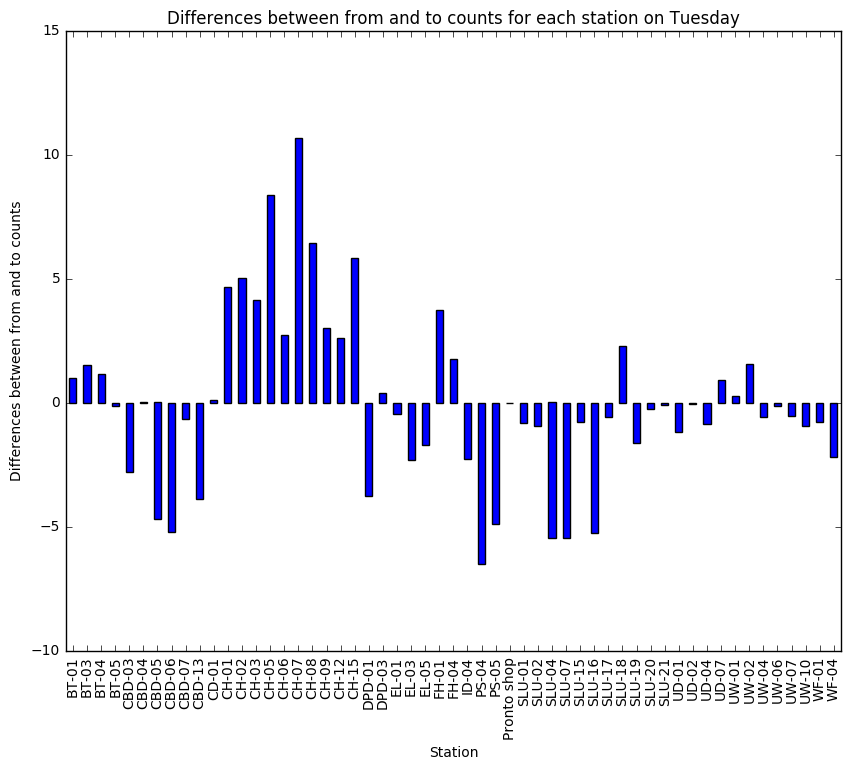

In [114]:
plot_title = "Tuesday"
day = 1
plot_bar1(day,plot_title)

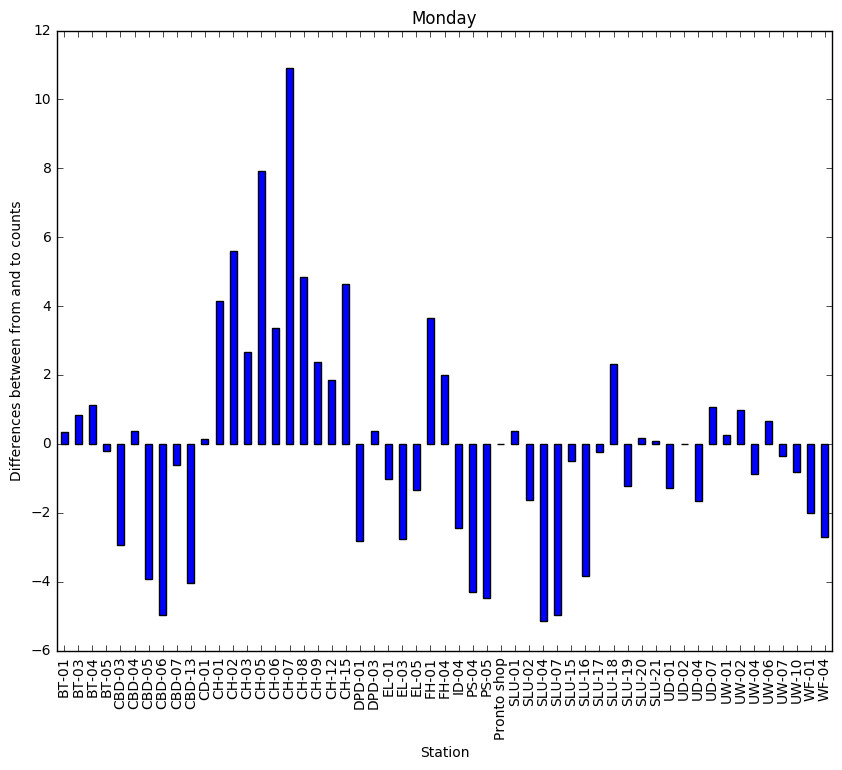

In [105]:
#n_groups = len(diff_counts_avg.index)
#index = np.arange(n_groups)  # The "raw" x-axis of the bar plot

fig = plt.figure(figsize=(10, 8))
diff_counts_avg[0].plot.bar()
#rects1 = plt.bar(index, diff_counts_avg[0])
plt.xlabel('Station')
plt.ylabel('Differences between from and to counts')
plt.title(plot_title)
#plt.xticks(index, diff_counts_avg.index)  # Convert "raw" x-axis into labels
#_, labels = plt.xticks()  # Get the new labels of the plot
#plt.setp(diff_counts_avg.index, rotation=90)
